In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
import pytorch_lightning
import transformers
from datasets import load_dataset

/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[03/13/25 16:56:53] INFO     PyTorch version 2.2.2 available.                                          ]8;id=265967;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/datasets/config.py\config.py]8;;\:]8;id=821202;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/datasets/config.py#54\54]8;;\

## Load Dataset

In [39]:
train_data = load_dataset('ccdv/mediasum', split='train')

In [40]:
train_df = train_data.to_pandas()

In [46]:
train_df.iloc[:10000].to_csv('train_10k.csv', index=False)

3249

In [45]:
train_df.to_csv('train_df.csv', index=False)

In [3]:
val_data = load_dataset('ccdv/mediasum', split='validation')

In [4]:
val_df = val_data.to_pandas()

In [5]:
val_df.to_csv('val_df.csv',index=False)

In [6]:
test_data = load_dataset('ccdv/mediasum', split='test')

In [7]:
test_df = test_data.to_pandas()

In [8]:
test_df.to_csv('test_df.csv',index=False)

In [6]:
df = {'Train': train_df,'Validation': val_df,'Test': test_df}

In [10]:
def calculate_len(data):
    for column in data.columns:
        data[column+'_len'] = data[column].apply(len)

In [11]:
for _, data in df.items():
    calculate_len(data)

In [12]:
def plot_len(data,name=''):
    data = data.select_dtypes('number')   

    fig, axis = plt.subplots(1, len(data.columns), figsize=(15,5))
    for i, column in enumerate(data.columns):
        axis[i].hist(data[column],bins=200,label=column)
        axis[i].legend()
        axis[i].set_title(name+' '+column)


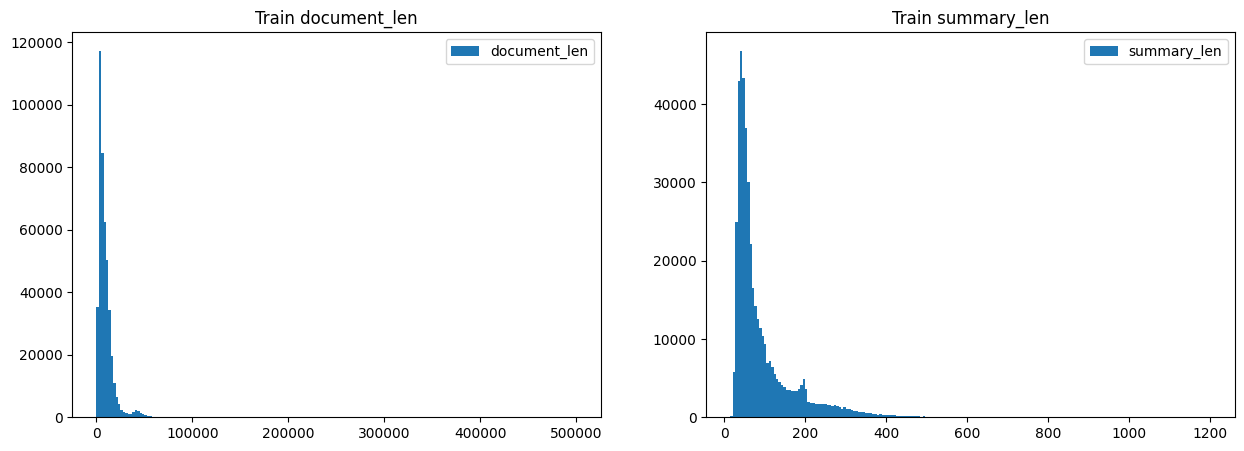

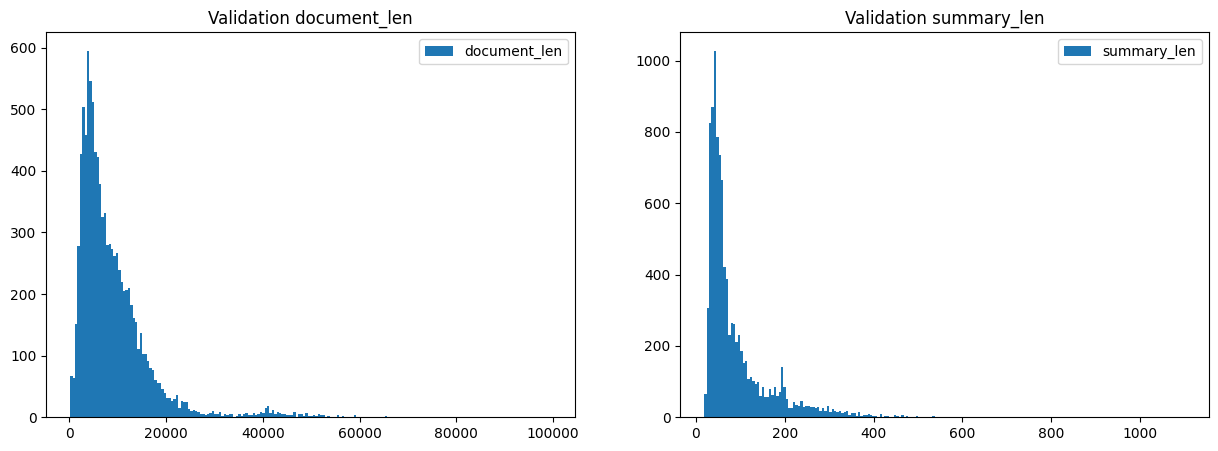

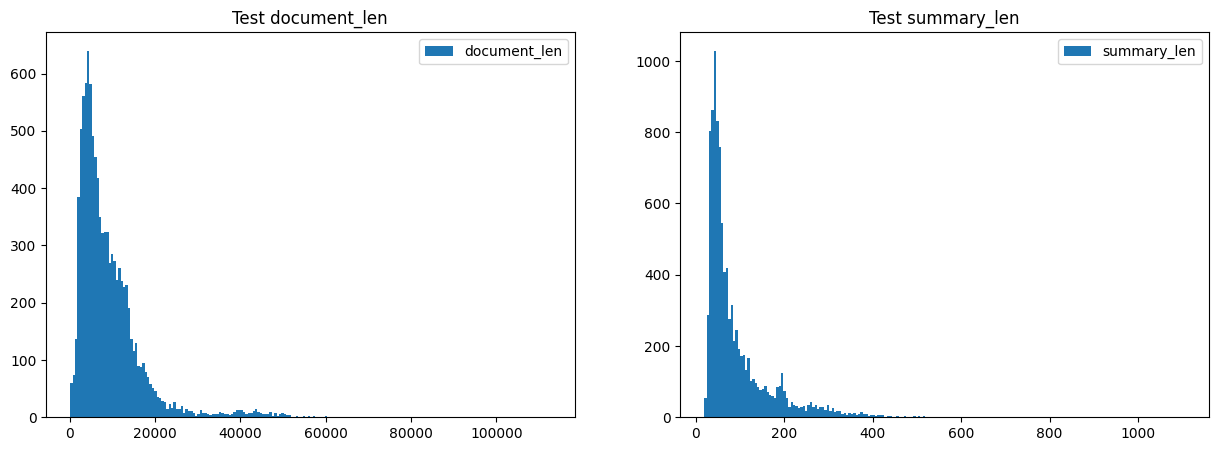

In [13]:
for name, data in df.items():
    plot_len(data, name)

In [14]:
for name, data in df.items():
    print(name)
    print(data.describe())

Train
        document_len    summary_len
count  443596.000000  443596.000000
mean     9254.264191      92.315269
std      8399.920383      79.683023
min        46.000000      15.000000
25%      4184.000000      43.000000
50%      7028.000000      60.000000
75%     11632.000000     108.000000
max    500555.000000    1202.000000
Validation
       document_len   summary_len
count  10000.000000  10000.000000
mean    9103.728100     91.042900
std     8017.625687     78.654613
min      219.000000     19.000000
25%     4147.750000     43.000000
50%     6922.000000     60.000000
75%    11590.250000    106.000000
max    99433.000000   1100.000000
Test
        document_len   summary_len
count   10000.000000  10000.000000
mean     9303.300400     91.901300
std      8161.962287     78.467859
min       109.000000     19.000000
25%      4207.750000     43.000000
50%      7027.500000     61.000000
75%     11832.250000    109.000000
max    112709.000000   1105.000000


## Prprocess Data 

In [22]:
import pytorch_lightning as pl
from transformer_model import SummarizationModel
from datamodule import SummarizationDataModule

In [23]:
MODEL_NAME = "facebook/bart-base"
TRAIN_DATA_PATH = "train_20k.csv"
VAL_DATA_PATH = "val_df.csv"
BATCH_SIZE = 1
MAX_LENGTH = 1024
SUMMARY_LENGTH = 256
LEARNING_RATE = 1e-5
EPOCHS = 3

In [24]:
data_module = SummarizationDataModule(TRAIN_DATA_PATH, VAL_DATA_PATH, MODEL_NAME, BATCH_SIZE, MAX_LENGTH,SUMMARY_LENGTH)

In [25]:
model = SummarizationModel(MODEL_NAME, lr=LEARNING_RATE)

In [26]:
trainer = pl.Trainer(
    max_epochs=EPOCHS,
    accelerator="cpu",  # Set to "cpu" if no GPU available
    devices=1,
    precision=16  # Mixed precision training
)

/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:736: UserWarning: You passed `Trainer(accelerator='cpu', precision=16)` but native AMP is not supported on CPU. Using `precision='bf16'` instead.
  rank_zero_warn(


[03/16/25 11:44:11] INFO     Using bfloat16 Automatic Mixed Precision (AMP)            ]8;id=799728;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py\accelerator_connector.py]8;;\:]8;id=940890;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py#743\743]8;;\

                    INFO     GPU available: False, used: False                                         ]8;id=726680;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py\setup.py]8;;\:]8;id=119995;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py#163\163]8;;\

                    INFO     TPU available: False, using: 0 TPU cores                                  ]8;id=818577;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py\setup.py]8;;\:]8;id=227645;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py#166\166]8;;\

                    INFO     IPU available: False, using: 0 IPUs                                       ]8;id=136945;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py\setup.py]8;;\:]8;id=6031;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py#169\169]8;;\

                    INFO     HPU available: False, using: 0 HPUs                                       ]8;id=383686;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py\setup.py]8;;\:]8;id=385456;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py#172\172]8;;\

/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


In [8]:
trainer.fit(model, datamodule=data_module)

/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(

  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M 
-------------------------------------------------------
139 M     Trainable params
0         Non-trainable params
139 M     Total params
557.682   Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:   0%|          | 0/30000 [00:00<?, ?it/s] 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [6]:
import sagemaker

In [9]:
import boto3
session = boto3.Session(profile_name='dev-user')
# session = boto3.Session()
client = session.client('s3')

[03/16/25 14:19:25] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=348374;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=628744;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py#1352\1352]8;;\

In [10]:
client.list_buckets()['Buckets']

[{'Name': '2024-portfolio-projects',
  'CreationDate': datetime.datetime(2024, 12, 2, 1, 47, 34, tzinfo=tzutc())},
 {'Name': 'analyticnerds.com',
  'CreationDate': datetime.datetime(2024, 12, 13, 3, 12, 31, tzinfo=tzutc())},
 {'Name': 'gen-ai-repository',
  'CreationDate': datetime.datetime(2025, 3, 8, 20, 36, 12, tzinfo=tzutc())}]

In [1]:
from sagemaker.pytorch import PyTorch
import os
from decouple import config

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[03/18/25 23:23:56] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=229440;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=701131;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py#1352\1352]8;;\

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/abhijitdeshpande/Library/Application Support/sagemaker/config.yaml


In [2]:
os.environ['AWS_PROFILE'] = 'dev-user'

In [3]:
pytorch_estimator = PyTorch(
    entry_point='train.py',
    role=config('ROLE'),
    source_dir=config('SOURCE_DIR'), #Folder containing train.py and other scripts
    framework_version='1.9.0',
    py_version='py38',
    instance_count=1,
    instance_type='ml.g4dn.2xlarge',
    hyperparameters={
        'epochs': 1,
        'batch_size': 1,
        'lr': 2e-5,
        'max_length': 512,
        'summary_length': 128,
        'model_name': 'facebook/bart-base',
    } 
)

[03/18/25 23:23:57] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=61853;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=840489;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py#1352\1352]8;;\

                    INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=143626;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=989607;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/botocore/credentials.py#1352\1352]8;;\

In [4]:
pytorch_estimator.fit(
    {
        "training": "s3://gen-ai-repository/train_10k.csv",
        "validation": "s3://gen-ai-repository/val.csv"
    
    }
)

                    INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=811765;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=415611;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/telemetry/telemetry_logging.py#91\91]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=117356;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=671188;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

[03/18/25 23:24:32] INFO     image_uri is not presented, retrieving image_uri based on            ]8;id=14295;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=48911;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/image_uris.py#681\681]8;;\
                             instance_type, framework etc.                                                         

                    INFO     Creating training-job with name:                                       ]8;id=190113;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=185228;file:///Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/session.py#1042\1042]8;;\
                             pytorch-training-2025-03-19-04-23-57-364                                              

2025-03-19 04:24:36 Starting - Starting the training job...
2025-03-19 04:24:50 Starting - Preparing the instances for training...
2025-03-19 04:25:33 Downloading - Downloading the training image...........................
2025-03-19 04:29:51 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2025-03-19 04:30:12,276 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2025-03-19 04:30:12,306 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2025-03-19 04:30:12,308 sagemaker_pytorch_container.training INFO     Invoking user training script.
2025-03-19 04:30:16,381 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/opt/conda/bin/python3.8 -m pip install -r requirements.txt
ERROR: Could not find a version that satisfies the requirement torch==2.1.0+cu121

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 pytorch_estimator.fit(                                                                       │
│   2 │   {                                                                                        │
│   3 │   │   "training": "s3://gen-ai-repository/train_10k.csv",                                  │
│   4 │   │   "validation": "s3://gen-ai-repository/val.csv"                                       │
│                                                                                                  │
│ /Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/tel │
│ emetry/telemetry_logging.py:167 in wrapper                                                       │
│                                                                                                  │
│   164 │   │   │   │   │   caught_ex = e                                                          │
│   165 │   │   │   │   finally:                                                                   │
│   166 │   │   │   │   │   if caught_ex:                                                          │
│ ❱ 167 │   │   │   │   │   │   raise caught_ex                                                    │
│   168 │   │   │   │   │   return response  # pylint: disable=W0150                               │
│   169 │   │   │   else:                                                                          │
│   170 │   │   │   │   logger.debug(                                                              │
│                                                                                                  │
│ /Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/tel │
│ emetry/telemetry_logging.py:138 in wrapper                                                       │
│                                                                                                  │
│   135 │   │   │   │   start_timer = perf_counter()                                               │
│   136 │   │   │   │   try:                                                                       │
│   137 │   │   │   │   │   # Call the original function                                           │
│ ❱ 138 │   │   │   │   │   response = func(*args, **kwargs)                                       │
│   139 │   │   │   │   │   stop_timer = perf_counter()                                            │
│   140 │   │   │   │   │   elapsed = stop_timer - start_timer                                     │
│   141 │   │   │   │   │   extra += f"&x-latency={round(elapsed, 2)}"                             │
│                                                                                                  │
│ /Users/abhijitdeshpande/opt/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sagemaker/wor │
│ kflow/pipeline_context.py:346 in wrapper                                                         │
│                                                                                                  │
│   343 │   │   │                                                                                  │
│   344 │   │   │   return _StepArguments(retrieve_caller_name(self_instance), run_func, *args,    │
│   345 │   │                                                                                      │
│ ❱ 346 │   │   return run_func(*args, **kwargs)                                                   │
│   347 │                                                                                          │
│   348 │   return wrapper                                                                         │
│   349                                                      

In [134]:
from sagemaker.pytorch import PyTorch

In [ ]:
estimator = PyTorch(
    entry_point="train.py",
    role=role,
    source_dir="source",
    framework_version="1.5.0",
    py_version="py3",
    instance_count=1,
    instance_type="ml.m4.xlarge",
    hyperparameters={"epochs": 1, "batch-size": 64},
)

In [ ]:
MODEL_NAME = "facebook/bart-base"
TRAIN_DATA_PATH = "train_20k.csv"
VAL_DATA_PATH = "val_df.csv"
BATCH_SIZE = 1
MAX_LENGTH = 1024
SUMMARY_LENGTH = 256
LEARNING_RATE = 1e-5
EPOCHS = 3